In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df=pd.read_csv('/kaggle/input/machine-learning-sentiment-analysis/ML_sentiments.csv',encoding='ISO-8859-1')

In [3]:
df.columns = ['Number', 'Unique ID','Date', 'Query','Name', 'text']

In [4]:
df.head()

,Number,Unique ID,Date,Query,Name,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Number     1599999 non-null  int64 
 1   Unique ID  1599999 non-null  int64 
 2   Date       1599999 non-null  object
 3   Query      1599999 non-null  object
 4   Name       1599999 non-null  object
 5   text       1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
neutral_index = df[df['Number'] == 2].index
df.drop(neutral_index, inplace=True)
df.drop(columns=['Unique ID', 'Date', 'Query', 'Name'], inplace=True)

<AxesSubplot:ylabel='Number'>

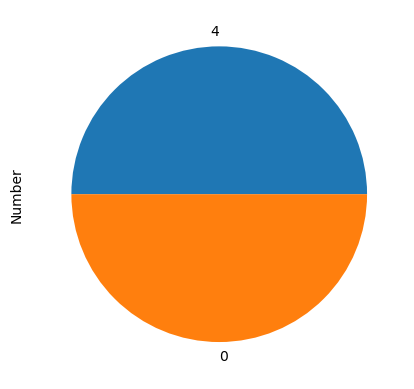

In [7]:
df['Number'].value_counts().plot(kind='pie')

In [8]:
stopwords = set(stopwords.words('english'))

In [9]:
def preprocess_text(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords]
    return ' '.join(words)

df['text'] = df['text'].apply(preprocess_text)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Number'], test_size=0.25, random_state=42)

In [11]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [12]:
model = LogisticRegression(solver = 'sag', max_iter = 2500, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2500, solver='sag')

In [13]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78    199581
           4       0.77      0.80      0.79    200419

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



In [14]:
new_text = 'This is a great movie!'
new_text = preprocess_text(new_text)
new_text_vectorized = vectorizer.transform([new_text])
sentiment = model.predict(new_text_vectorized)
print('Sentiment:', sentiment[0])

Sentiment: 4


In [15]:
filename = 'sentiment_model.sav'
pickle.dump(model, open(filename, 'wb'))